<a href="https://colab.research.google.com/github/shikhar2402/Analyze-This-2019/blob/master/MNIST_Inkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

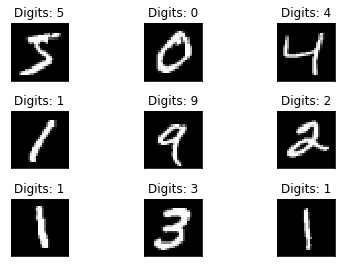

In [122]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digits: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [123]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [124]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [0]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [126]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [132]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_31 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_32 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

#No of trainable parameters =====>>>>> 594,922


In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [129]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=150, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 0.2636 - accuracy: 0.9211 - val_loss: 0.1101 - val_accuracy: 0.9662
Epoch 2/20
 - 8s - loss: 0.1054 - accuracy: 0.9672 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 3/20
 - 8s - loss: 0.0724 - accuracy: 0.9772 - val_loss: 0.0706 - val_accuracy: 0.9768
Epoch 4/20
 - 8s - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0779 - val_accuracy: 0.9740
Epoch 5/20
 - 8s - loss: 0.0449 - accuracy: 0.9851 - val_loss: 0.0667 - val_accuracy: 0.9792
Epoch 6/20
 - 8s - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0645 - val_accuracy: 0.9797
Epoch 7/20
 - 8s - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.0714 - val_accuracy: 0.9805
Epoch 8/20
 - 8s - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.0604 - val_accuracy: 0.9825
Epoch 9/20
 - 8s - loss: 0.0266 - accuracy: 0.9910 - val_loss: 0.0631 - val_accuracy: 0.9820
Epoch 10/20
 - 8s - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0667 - val_accuracy: 0.9811
Epoch 11/20
 - 8s -

In [130]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.08860748256827344
Test Accuracy 0.9807999730110168


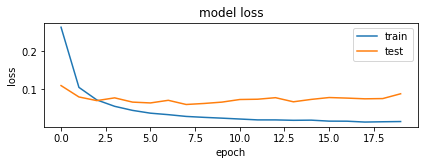

In [131]:
fig = plt.figure()
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig